With all of the data acquired and stored I now wanted to analyze the data to see if there was any useful information to learn from it. 

In order to be able to analyze it I will pull all of the data from the csv files. This could also be done by pulling the data from the database (which I will include in comments). 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import pyodbc

"""
### Here is the method to create the panda dataframes from the database

connection_string = f'Driver={{ODBC Driver 13 for SQL Server}};Server=stairway.usu.edu,1433;Database=codycrofoot;Uid={os.environ["SQLUserName"]};Pwd={os.environ["SQLPASSWORD"]}'
conn = pyodbc.connect(connection_string, autocommit=True)
print(conn)
curs = conn.cursor()


tables = ['SuppressionCosts', 'BigFires', 'HumanFireAcres', 'HumanFireNum', 'LightningFireAcres', 'LightningFireNum', 'TotalFires']

SQL_Queries = []
for i in range(len(tables)):
    SQL_Query = pd.read_sql_query(
    f'''SELECT *
    FROM {tables[i]}
    ''', conn)
    SQL_Queries.append(SQL_Query)
    
sc_df = pd.DataFrame(SQL_Queries[0]).set_index('Year', drop=False)
bf_df = pd.DataFrame(SQL_Queries[1]).set_index('Year', drop=False)
hfa_df = pd.DataFrame(SQL_Queries[2]).set_index('Year', drop=False)
hfn_df = pd.DataFrame(SQL_Queries[3]).set_index('Year', drop=False)
lfa_df = pd.DataFrame(SQL_Queries[4]).set_index('Year', drop=False)
lfn_df = pd.DataFrame(SQL_Queries[5]).set_index('Year', drop=False)
tf_df = pd.DataFrame(SQL_Queries[6]).set_index('Year', drop=False)
"""    
sc_df = pd.read_csv('suppression_costs.csv').set_index('Year', drop=False)
bf_df = pd.read_csv('big_fires.csv').set_index('Year', drop=False)
hfa_df = pd.read_csv('human_fire_acres.csv').set_index('Year', drop=False)
hfn_df = pd.read_csv('human_fire_num.csv').set_index('Year', drop=False)
lfa_df = pd.read_csv('lightning_fire_acres.csv').set_index('Year', drop=False)
lfn_df = pd.read_csv('lightning_fire_num.csv').set_index('Year', drop=False)
tf_df = pd.read_csv('total_fires.csv').set_index('Year', drop=False)

Now that the Panda DataFrames are set it is time to perform some analytics on the data.

The first question I wanted to answer was a basic question to demonstrate the panda DataFrame was functioning properly.

In [4]:
##################################################################################
# Question 1: How many fires were there in 2018? human caused? lightning caused? #
##################################################################################

print("Total Fires in 2018: ", tf_df.loc[2018]['Fires'])
print("Total Acres in 2018: ", tf_df.loc[2018]['Acres'])
print()

print("Total Human Fire Number: ", hfn_df.loc[2018]['Total'])
print("Total Human Fire Acres: ", hfa_df.loc[2018]['Total'])
print()

print("Total Lightning Fire Number: ", lfn_df.loc[2018]['Total'])
print("Total Lightning Fire Acres: ", lfa_df.loc[2018]['Total'])
print()

hfn_num = hfn_df.loc[2018]['Total']
lfn_num = lfn_df.loc[2018]['Total']

print("Total Number according to hfa and lfa: ", hfn_num+lfn_num)

# This proves that the lfa and hfa (or lfn and hfn) should add up to equal the totals table


Total Fires in 2018:  58083.0
Total Acres in 2018:  8767492.0

Total Human Fire Number:  51576.0
Total Human Fire Acres:  5640489.0

Total Lightning Fire Number:  6507.0
Total Lightning Fire Acres:  3127003.0

Total Number according to hfa and lfa:  58083.0


In [11]:
##################################################################
# QUESTION TWO: What year had the most fires? Most Acres burned? #
##################################################################

# --- Most Fires
print("----------------Most Fires------------------", "\n")
tf_max_fire = tf_df[tf_df['Fires'] == tf_df['Fires'].max()]
print(tf_max_fire, "\n")
print("Year: ", tf_max_fire.iloc[0][1]) # This returns just the number
print()


# --- Most acres
print("----------------Most Acres------------------", "\n")
tf_max_acre = tf_df[tf_df['Acres'] == tf_df['Acres'].max()]
print(tf_max_acre, "\n")
print("Year: ", tf_max_acre.iloc[0][2]) # This Returns Just the number
print()

----------------Most Fires------------------ 

      generated_id  Year    Fires      Acres
Year                                        
2006            13  2006  96385.0  9873745.0 

Year:  2006.0

----------------Most Acres------------------ 

      generated_id  Year    Fires       Acres
Year                                         
2015             4  2015  68151.0  10125149.0 

Year:  68151.0



In [13]:
############################################################################
# QUESTION THREE: From 1985 - 2018 Who has spent more money on wildfires:  #
#                 The Forest Service or DOI Agencies?                      #
#                 What has the total spending been?                        #
############################################################################

# Get a list of the columns
# print(sc_df.columns)
# print()

fs_total = sc_df['ForestService'].sum()
print('Forest Service Total: ', '${:,.2f}'.format(fs_total))

doi_total = sc_df['DOIAgencies'].sum()
print('DOI Agencies Total: ', '${:,.2f}'.format(doi_total))

if doi_total > fs_total:
    print('DOI spent more money on wildfires')
else:
    print('USFS spent more money on wildfires')

print()
print('Total Spending: ', '${:,.2f}'.format((doi_total + fs_total)))


Forest Service Total:  $28,255,399,000.00
DOI Agencies Total:  $8,675,073,000.00
USFS spent more money on wildfires

Total Spending:  $36,930,472,000.00


Dollar Per Acre Chart:
Year
1985     82.849040
1986     74.573711
1987    136.930310
1988    115.570470
1989    273.509695
1990     86.106585
1991     69.786544
1992    182.356979
1993    133.755829
1994    225.436895
1995    259.230685
1996    115.592356
1997     99.458200
1998    313.381023
1999     91.629484
2000    191.075146
2001    266.793544
2002    233.000293
2003    335.064615
2004    124.383666
2005     94.247593
2006    172.627205
2007    173.685376
2008    299.643947
2009    155.447867
2010    236.507238
2011    157.785225
2012    203.988575
2013    403.036338
2014    423.335047
2015    210.420903
2016    358.959091
2017    291.057248
2018    358.512560
dtype: float64

Year
2014    423.335047
dtype: float64
$423.34 dollars per acre

--------------Graphing----------------- 



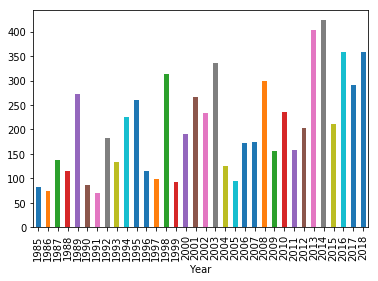

In [15]:
##############################################################################################
# QUESTION FOUR: What year had the most money spent per acre in federal firefighting costs?  #
#                Graph that chart                                                            #
##############################################################################################

# Get a list of the columns
# print(sc_df.columns)
# print()

dollars_per_acre = sc_df['Total']/sc_df['Acres']

print("Dollar Per Acre Chart:")
print(dollars_per_acre)
print()

# tf_max_fire = tf_df[tf_df['Fires'] == tf_df['Fires'].max()]
most_dollar_per_acre = dollars_per_acre[dollars_per_acre == dollars_per_acre.max()]

print(most_dollar_per_acre)
print('${:,.2f}'.format(most_dollar_per_acre.iloc[0]), "dollars per acre")

print()
print('--------------Graphing-----------------', '\n')

dollars_per_acre.plot(kind='bar', x='Total', y='Year')
plt.show()

------------QUESTION FIVE------------

Table of State Totals from BigFires:
       generated_id    TotalAcres
State                            
A                52  2.575490e+05
Ak             4589  1.264220e+07
Az              309  1.597451e+06
Ca             2376  4.872641e+06
Co              314  2.458050e+05
Fl              176  1.085740e+05
Ga              443  1.133656e+06
ID              201  1.200000e+01
Id             2503  5.212468e+06
Mt             1398  2.077258e+06
Nm              482  6.945470e+05
Nv             2028  4.282827e+06
Ok              259  1.964878e+06
Or             1981  3.656046e+06
Sd               30  3.510000e+05
Tx             1131  2.996328e+06
Ut              399  5.730890e+05
Wa             1096  1.703411e+06
Wy              135  1.376000e+05

merged: 
            Region  TotalAcres
0           Alaska      4641.0
1        Northwest      3077.0
2       California      2376.0
3  NorthernRockies      1398.0
4       GreatBasin      4930.0
5        South

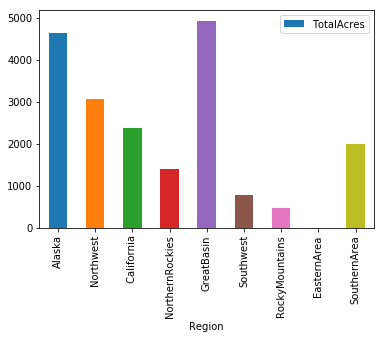

In [19]:
##############################################################################################
# QUESTION FIVE: From the BigFires Table, group all of the fires by each states total acres  #
#                Group them into regions. Graph it by region                                 #
##############################################################################################

print('------------QUESTION FIVE------------\n')

print("Table of State Totals from BigFires:")
bf_state = bf_df.groupby(['State']).sum()
bf_state['TotalAcres'] = bf_state['TotalAcres']#.map('{:,.2f}'.format)
bf_state = bf_state.drop(['Year'], axis=1)

print(bf_state)
print()

# this is a check sum to make sure I did the math correctly, formatting causes errors
# print("Total sum: ", bf_state['TotalAcres'].sum(axis=0, skipna=True))


# REGIONS
# Note: some generalizations are made because states don't perfectly align with the regions
# Note: if a state was not in the big fire list it was not added into the region

# Alaska Region: AK
# tf_max_acre = tf_df[tf_df['Acres'] == tf_df['Acres'].max()]
bf_alaska = bf_state.loc['Ak']
bf_alaska = bf_alaska + bf_state.loc['A']

# Northwest: WA, OR
bf_northwest = bf_state.loc['Wa'] + bf_state.loc['Or']

# California: CA, HI (note combining the two california regions for comparability)
bf_california = bf_state.loc['Ca']

# Northern Rockies: North ID, MT, ND
bf_northern_rockies = bf_state.loc['Mt']

# Great basin/Western: ID, NV, UT (note combined with western Great Basin)
bf_great_basin = bf_state.loc['Id'] + bf_state.loc['Nv'] + bf_state.loc['Ut']

# Southwest: AZ, NM, West TX
bf_southwest = bf_state.loc['Az'] + bf_state.loc['Nm']

# Rocky Mountains: WY, CO, SD, NE, KS
bf_rocky_mountains = bf_state.loc['Wy'] + bf_state.loc['Co'] + bf_state.loc['Sd']

# Eastern: MN, IA, MO, WI, IL, MI, IN, OH, WV, PA, NY, VT, ME, NH, MA, RI, CT, NK, DE, MD
bf_eastern_area = 0


# Southern Area: TX, OK, AR, LA, MS, AL, TN, KY, VA, SC, NC, GA, FL, PR
bf_southern_area = bf_state.loc['Tx'] + bf_state.loc['Ok'] + bf_state.loc['Ga'] + bf_state.loc['Fl']

# Merged
region_list = ['Alaska', 'Northwest', ' California', 'NorthernRockies', 'GreatBasin', 'Southwest', 'RockyMountains', 'EasternArea', 'SouthernArea']
bf_region_list = [bf_alaska, bf_northwest, bf_california, bf_northern_rockies, bf_great_basin, bf_southwest, bf_rocky_mountains, bf_eastern_area, bf_southern_area]

bf_state_region = pd.DataFrame(columns=['Region','TotalAcres'])

for i in range(len(region_list)):
    if type(bf_region_list[i]) == type(0):
        bf_state_region = bf_state_region.append({'Region': f'{region_list[i]}', 'TotalAcres':bf_region_list[i]},
                                                 ignore_index=True)
    else:
        bf_state_region = bf_state_region.append({'Region': f'{region_list[i]}', 'TotalAcres': bf_region_list[i].iloc[0]},
                                                 ignore_index=True)

print("merged: ")
print(bf_state_region)

print()
print('--------------Graphing---------------')
bf_state_region.plot(kind='bar', x='Region', y='TotalAcres')
plt.show()


---------------------QUESTION SIX-----------------------
      Year  HF_AcresPerFire
0   2018.0       109.362669
1   2017.0        76.015422
2   2016.0        61.816615
3   2015.0        34.158140
4   2014.0        28.426696
5   2013.0        32.907768
6   2012.0        42.863126
7   2011.0        83.860717
8   2010.0        20.112781
9   2009.0        29.759454
10  2008.0        48.934858
11  2007.0        46.964573
12  2006.0        54.909549
13  2005.0        26.036745
14  2004.0        17.833312
15  2003.0        37.828377
16  2002.0        49.613347
17  2001.0        24.957340

      Year  LF_AcresPerFire
0   2018.0       480.559859
1   2017.0       653.289325
2   2016.0       256.757732
3   2015.0       878.471900
4   2014.0       253.730367
5   2013.0       331.263922
6   2012.0       722.862332
7   2011.0       327.309591
8   2010.0       295.822864
9   2009.0       421.028221
10  2008.0       210.306798
11  2007.0       479.462605
12  2006.0       338.317414
13  2005.0       8

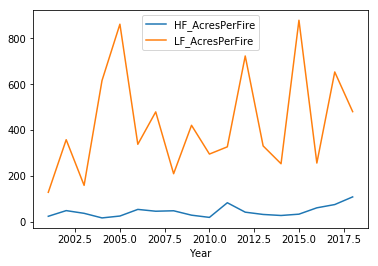

In [21]:
########################################################################################################
# QUESTION SIX: What results in more acres burned per year per fire? human or lightning caused fires?  #
#               Determine this on an overall scale as well as a per region scale.                      #
########################################################################################################
print('---------------------QUESTION SIX-----------------------')

# Overall acres per fire (acres/fires) -- human caused
# print(hfa_df)
# print(hfn_df)

hf_acres_per_fire_df = pd.DataFrame(columns=['Year', 'HF_AcresPerFire'])
for i in range(len(hfa_df)):
    hf_acres_per_fire_df = hf_acres_per_fire_df.append({'Year': hfa_df['Year'].iloc[i],'HF_AcresPerFire': (hfa_df['Total'].iloc[i]/hfn_df['Total'].iloc[i])}, ignore_index=True)

print(hf_acres_per_fire_df)
print()

# Overall acres per fire (acres/fires) -- lightning caused
# print(lfa_df)
# print(lfn_df)

lf_acres_per_fire_df = pd.DataFrame(columns=['Year', 'LF_AcresPerFire'])
for i in range(len(lfa_df)):
    lf_acres_per_fire_df = lf_acres_per_fire_df.append({'Year': lfa_df['Year'].iloc[i],'LF_AcresPerFire': (lfa_df['Total'].iloc[i]/lfn_df['Total'].iloc[i])}, ignore_index=True)

print(lf_acres_per_fire_df)
print()

# Plot on top of each other
hf_ax = hf_acres_per_fire_df.plot(x='Year', y='HF_AcresPerFire')
lf_acres_per_fire_df.plot(ax=hf_ax, x='Year', y='LF_AcresPerFire')

plt.show()